<a href="https://colab.research.google.com/github/Vixuz144/Robin-Hood/blob/main/Proceso_de_Poisson_bivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proceso de Poisson Bivariado

La necesidad de este método de generación de puntos aleatorios en el espacio $(\mathbb{R}^2)$ surge al necesitar una técnica que genere los árboles del bosque de Sherwood. Para ello la primera implementación se hace con base en la descrita en el libro "Simulation, Sheldon M. Ross, 4th edition" en el capítulo 11.2.

#Simulación

Se genera una secuencia de puntos aleatorios dentro de una circunferencia de radio r.

In [1]:
from random import random
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

Para la generación de números aleatorios del proceso, se usará la siguiente función, la cual genera un proceso de poisson bivariado. Toma tres parámetros de entrada:
* r: radio del circulo dentro del cual se generarán los puntos aleatorios.
* ρ: parámetro del proceso. Media de la generacián de números aleatorios respecto al eje r (coordenadas polares).
* polar: Boleano que indica el tipo de coordenadas requeridas. En caso de ser *False* regresa los puntos aleatorios en coordenadas cartesianas. En caso de ser *True* regresa los puntos aleatorios en coordenadas polares.

Salida:
  * X, Y: Array's de coordenadas cartesianas corespondientes a los puntos aleatorios generados.
  *  R, θ: Listas de coordenadas polares corespondientes a los puntos aleatorios generados.


In [2]:
def Poisson_bivariado(r, ρ, polar = False):
  n = 0
  X = []
  while sum(X) <= np.pi*r**2:
    n += 1
    X.append(-np.log(random())/ρ)

  R, θ = [], []
  i = 1
  while n>1 and i<n:
    R.append(np.sqrt(sum(X[:i])/np.pi))
    θ.append(2*np.pi*random())
    i += 1

  if polar:
    plt.style.use('dark_background')
    plt.axes(projection='polar')
    plt.plot(R, θ, '.')
    plt.plot(0,0,'w.')
    plt.title('Proceso de Poisson Bivariado')
    plt.grid(color='gray')
    plt.show()
    return R, θ
  else:
    X = R*np.cos(θ)
    Y = R*np.sin(θ)

    plt.style.use('dark_background')
    plt.plot(X,Y, '.')
    plt.plot(0,0,'w.')
    plt.title('Proceso de Poisson Bivariado')
    plt.grid(color='gray')
    plt.show()
    return X, Y

Con la anterior función se generarán dos listas de números aleatorios.

In [3]:
radio = 600
densidad = 0.005
estrella = np.log10(10**-14)
print(estrella)

-14.0


A continuaiòn se muestra una gráfica en cordenadas cartesianas para este proceso.

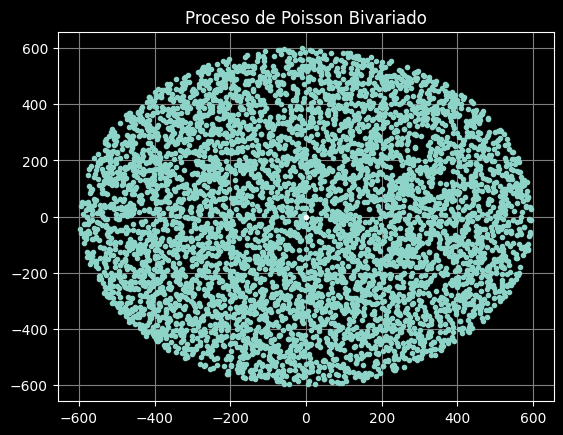

In [4]:
X, Y = Poisson_bivariado(radio, densidad)

Y ahora se muestra otra gráfica distinta del mismo proceso pero esta vez en coordenadas polares.

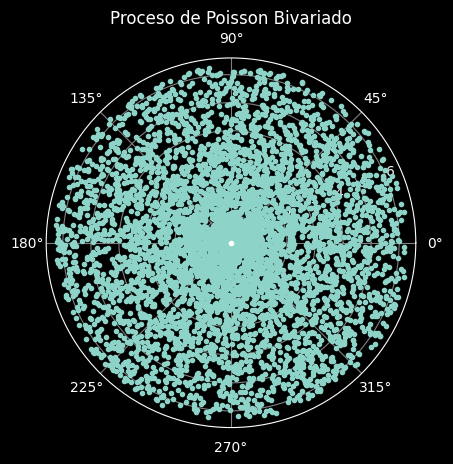

In [5]:
R, θ = Poisson_bivariado(radio, densidad, True)

Ahora, el siguiente paso será darle un grosor a cada punto. Para ello usaremos la siguinte función.

In [6]:
def disparo_flecha(X, Y, R, max_dist):
  n = len(X)

  pos = np.equal(X>0, True*np.ones(n))
  X_pos, Y_pos, R_pos = X[pos], Y[pos], R[pos]

  s = np.argsort(X_pos)
  X, Y, R = X_pos[s], Y_pos[s], R_pos[s]
  n = len(Y)

  x, y, r = 0, 0, 0
  for i in range(n):
    if abs(Y[i]) <= R[i]:
      x, y, r = X[i], Y[i], R[i]
      break
  if x != 0 or y!= 0:
    d = x - np.sqrt(r**2 - y**2)
  else:
    d = max_dist
  return x, y, d

Luego, con los árboles generados aneteriormente realizamos el disparo de la flecha. Lo que resulta en lo siguiente.

In [7]:
ra = np.ones(len(X))
x, y, d = disparo_flecha(X, Y, ra, radio)

print(f'La flecha impactó en el arbol con coordenadas ({x},{y}). La flecha recorrió {d}m')

La flecha impactó en el arbol con coordenadas (245.69721731002224,-0.3516099007163142). La flecha recorrió 244.7610706987918m
